In [1]:
import os
import xarray as xr
import pandas as pd

# Set the path to the directory where the dataset files are located
data_dir = '/kaggle/input/temperature-dataset'

def load_data(data_dir):
  temperature_data = []
  for file in os.listdir(data_dir):
    if file.startswith("ST"):  # Only consider files starting with "ST"
      temperature_file_path = os.path.join(data_dir, file)
      temperature = xr.open_dataset(temperature_file_path)
      temperature_data.append(temperature)
  return temperature_data

def dataframes_from_xarray(xr_data):
  dfs = []
  for data in xr_data:
    df = data.to_dataframe().reset_index()
    dfs.append(df)
  return dfs

temperature_data = load_data(data_dir)
temperature_dfs = dataframes_from_xarray(temperature_data)


In [2]:
temperature_dfs

[         lon        lat  Temperature
 0      68.16  37.079999          NaN
 1      68.16  36.959999          NaN
 2      68.16  36.839999          NaN
 3      68.16  36.719999          NaN
 4      68.16  36.599999          NaN
 ...      ...        ...          ...
 62225  97.44   7.199999          NaN
 62226  97.44   7.079999          NaN
 62227  97.44   6.959999          NaN
 62228  97.44   6.839999          NaN
 62229  97.44   6.719999          NaN
 
 [62230 rows x 3 columns],
          lon        lat  Temperature
 0      68.16  37.079999          NaN
 1      68.16  36.959999          NaN
 2      68.16  36.839999          NaN
 3      68.16  36.719999          NaN
 4      68.16  36.599999          NaN
 ...      ...        ...          ...
 62225  97.44   7.199999          NaN
 62226  97.44   7.079999          NaN
 62227  97.44   6.959999          NaN
 62228  97.44   6.839999          NaN
 62229  97.44   6.719999          NaN
 
 [62230 rows x 3 columns],
          lon        lat  Temp

In [4]:
temperature = pd.concat(temperature_dfs, ignore_index=False)

# Display the combined DataFrame
print(temperature)

         lon        lat  Temperature
0      68.16  37.079999          NaN
1      68.16  36.959999          NaN
2      68.16  36.839999          NaN
3      68.16  36.719999          NaN
4      68.16  36.599999          NaN
...      ...        ...          ...
62225  97.44   7.199999          NaN
62226  97.44   7.079999          NaN
62227  97.44   6.959999          NaN
62228  97.44   6.839999          NaN
62229  97.44   6.719999          NaN

[2675890 rows x 3 columns]


In [5]:
# Filter the original DataFrame to include only rows with non-NaN values
data = temperature.dropna()

In [6]:
data

,lon,lat,Temperature
364,68.28,23.879999,309.762970
365,68.28,23.759999,305.813080
366,68.28,23.639999,302.292175
618,68.40,23.879999,310.359985
619,68.40,23.759999,305.936737
...,...,...,...
61542,97.20,28.199999,286.525513
61543,97.20,28.079999,286.059998
61544,97.20,27.959999,285.915924
61796,97.32,28.199999,286.910706


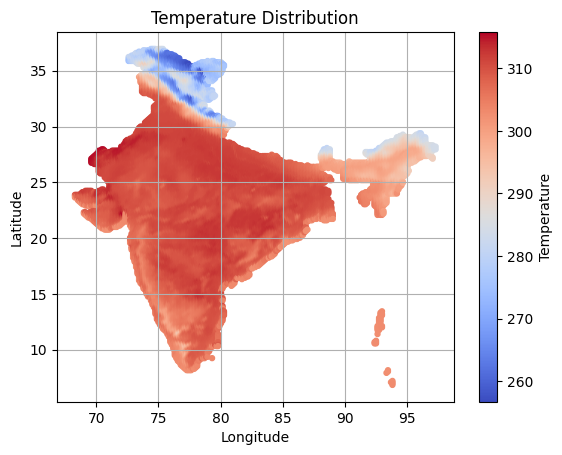

In [7]:
import matplotlib.pyplot as plt

# Slice the DataFrame to get the first 20178 records
subset_df = data.head(20184)

# Plot lon vs. lat with humidity_avg as the color
plt.scatter(subset_df['lon'], subset_df['lat'], c=subset_df['Temperature'], cmap='coolwarm',marker='.', s=50)
plt.colorbar(label='Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature Distribution')
plt.grid(True)
plt.show()

In [8]:
data = data[['Temperature', 'lat', 'lon']]
data

,Temperature,lat,lon
364,309.762970,23.879999,68.28
365,305.813080,23.759999,68.28
366,302.292175,23.639999,68.28
618,310.359985,23.879999,68.40
619,305.936737,23.759999,68.40
...,...,...,...
61542,286.525513,28.199999,97.20
61543,286.059998,28.079999,97.20
61544,285.915924,27.959999,97.20
61796,286.910706,28.199999,97.32


In [9]:
# prompt: do MinMaxScaler() to data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
data_scaled

array([[0.89033909, 0.56573705, 0.        ],
       [0.82827266, 0.56175299, 0.        ],
       [0.77294709, 0.55776892, 0.        ],
       ...,
       [0.51561959, 0.70119522, 0.99586777],
       [0.53125104, 0.70916335, 1.        ],
       [0.5100138 , 0.70119522, 1.        ]])

In [11]:
features = data_scaled
target = data_scaled[:,:1]

In [12]:
target

array([[0.89033909],
       [0.82827266],
       [0.77294709],
       ...,
       [0.51561959],
       [0.53125104],
       [0.5100138 ]])

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2024-05-23 06:10:15.670229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 06:10:15.670350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 06:10:15.970976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
train_size = 666072
test_size = 201840

# Splitting the data
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:train_size+test_size]

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_scaled, train_size=train_size, test_size=test_size, shuffle=False)

In [16]:
x_train = train_data[:,:]
y_train = train_data[:, 0]   # Target variable


x_test = test_data[:,:]
y_test = test_data[:, 0]

In [17]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (666072, 3)
Shape of y_train: (666072,)
Shape of x_test: (201840, 3)
Shape of y_test: (201840,)


In [18]:
y_train

array([0.89033909, 0.82827266, 0.77294709, ..., 0.51533282, 0.51322334,
       0.50942493])

In [19]:
x_test

array([[0.87889255, 0.56573705, 0.        ],
       [0.81589582, 0.56175299, 0.        ],
       [0.76072993, 0.55776892, 0.        ],
       ...,
       [0.51561959, 0.70119522, 0.99586777],
       [0.53125104, 0.70916335, 1.        ],
       [0.5100138 , 0.70119522, 1.        ]])

In [20]:
win_length=20184
batch_size=200
num_features=3
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [21]:
print("Number of training steps:", len(train_generator))
print("Number of validation steps:", len(test_generator))

Number of training steps: 3230
Number of validation steps: 909


In [22]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length, num_features)))

# Add max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add LSTM layer
model.add(LSTM(64, return_sequences=True))  # Return sequences for stacking LSTM layers

# Add another LSTM layer
model.add(LSTM(32,return_sequences=False))

# Add dropout layer for regularization
model.add(Dropout(0.5))

# Add dense layer
model.add(Dense(1))  # Output layer for regression, no activation function

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Using Mean Squared Error loss for regression

# Print the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20182, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10091, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10089, 32)      │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10089, 64)      │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,097 (172.25 KB)

 Trainable params: 44,097 (172.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
patience=2,
mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
optimizer=tf.optimizers.Adam(),
metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(train_generator, epochs=10,
validation_data=test_generator,
shuffle=False,
callbacks=[early_stopping])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3230/3230 ━━━━━━━━━━━━━━━━━━━━ 3312s 1s/step - loss: 0.0301 - mean_absolute_error: 0.1218 - val_loss: 0.0067 - val_mean_absolute_error: 0.0669
Epoch 2/10
3230/3230 ━━━━━━━━━━━━━━━━━━━━ 3301s 1s/step - loss: 0.0034 - mean_absolute_error: 0.0354 - val_loss: 0.0030 - val_mean_absolute_error: 0.0337
Epoch 3/10
3230/3230 ━━━━━━━━━━━━━━━━━━━━ 3301s 1s/step - loss: 0.0026 - mean_absolute_error: 0.0275 - val_loss: 0.0048 - val_mean_absolute_error: 0.0477
Epoch 4/10
3230/3230 ━━━━━━━━━━━━━━━━━━━━ 3303s 1s/step - loss: 0.0027 - mean_absolute_error: 0.0277 - val_loss: 0.0030 - val_mean_absolute_error: 0.0399


In [41]:
import tensorflow as tf
# Path to your model file
model_path = '/kaggle/input/temperature-model/CNN_LSTM_model_Temp.h5'

# Load the model
model = tf.keras.models.load_model(model_path)

# Now you can use your model for predictions


In [24]:
model.evaluate(test_generator, verbose=0)

[0.0030112864915281534, 0.0398675762116909]

In [25]:
predictions = model.predict(test_generator)

909/909 ━━━━━━━━━━━━━━━━━━━━ 362s 398ms/step


In [26]:
predictions.shape

(181656, 1)

In [27]:
predict_df = pd.DataFrame(predictions)

In [28]:
predict_df

,0
0,0.556474
1,0.748338
2,0.865642
3,0.845108
4,0.830456
...,...
181651,0.659707
181652,0.591367
181653,0.563055
181654,0.577816


In [29]:
x_test.shape

(201840, 3)

In [30]:
x_test[:,1:][win_length:]

array([[0.56573705, 0.        ],
       [0.56175299, 0.        ],
       [0.55776892, 0.        ],
       ...,
       [0.70119522, 0.99586777],
       [0.70916335, 1.        ],
       [0.70119522, 1.        ]])

In [31]:
df_pred = pd.concat([(predict_df), pd.DataFrame(x_test[:,1:][win_length:])], axis = 1)

In [32]:
df_pred

,0,0,1
0,0.556474,0.565737,0.000000
1,0.748338,0.561753,0.000000
2,0.865642,0.557769,0.000000
3,0.845108,0.565737,0.004132
4,0.830456,0.561753,0.004132
...,...,...,...
181651,0.659707,0.709163,0.995868
181652,0.591367,0.705179,0.995868
181653,0.563055,0.701195,0.995868
181654,0.577816,0.709163,1.000000


In [33]:
pred = df_pred.tail(20184)

In [34]:
pred

,0,0,1
161472,0.557250,0.565737,0.000000
161473,0.784146,0.561753,0.000000
161474,0.876296,0.557769,0.000000
161475,0.807932,0.565737,0.004132
161476,0.846126,0.561753,0.004132
...,...,...,...
181651,0.659707,0.709163,0.995868
181652,0.591367,0.705179,0.995868
181653,0.563055,0.701195,0.995868
181654,0.577816,0.709163,1.000000


In [35]:
rev = scaler.inverse_transform(pred)

In [36]:
rev

array([[288.56529255,  23.879999  ,  68.28      ],
       [303.00489836,  23.759999  ,  68.28      ],
       [308.86925554,  23.639999  ,  68.28      ],
       ...,
       [288.93470318,  27.959999  ,  97.2       ],
       [289.8740949 ,  28.199999  ,  97.32      ],
       [289.95341878,  27.959999  ,  97.32      ]])

In [37]:
df_final = data[pred.shape[0]*-1:]

In [38]:
df_final.count()

Temperature    20184
lat            20184
lon            20184
dtype: int64

In [39]:
df_final["Predicted"] = rev[:,0]

/tmp/ipykernel_34/43512189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Predicted"] = rev[:,0]


In [40]:
df_final

,Temperature,lat,lon,Predicted
364,310.484711,23.879999,68.28,288.565293
365,306.123901,23.759999,68.28,303.004898
366,302.330902,23.639999,68.28,308.869256
618,311.363403,23.879999,68.40,304.518622
619,306.361420,23.759999,68.40,306.949266
...,...,...,...,...
61542,286.525513,28.199999,97.20,295.085612
61543,286.059998,28.079999,97.20,290.736439
61544,285.915924,27.959999,97.20,288.934703
61796,286.910706,28.199999,97.32,289.874095


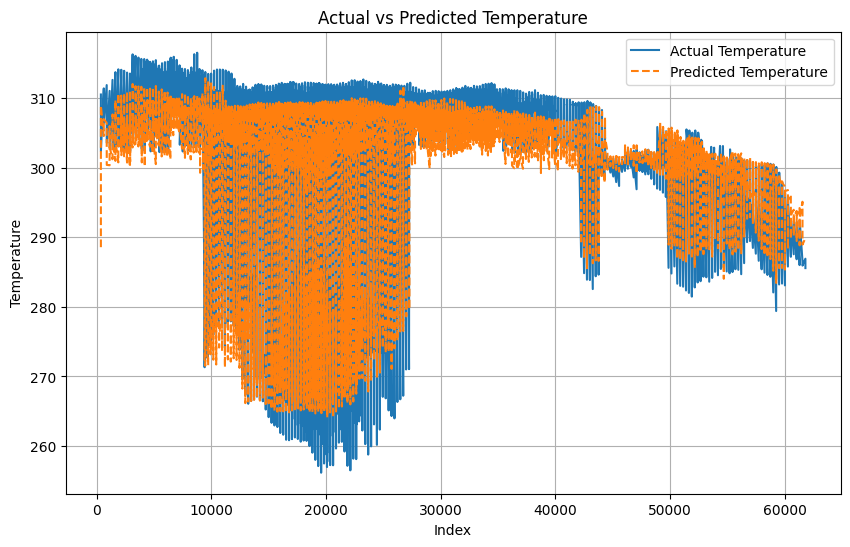

In [41]:
import matplotlib.pyplot as plt

# Extract humidity_avg and Predicted columns
temperature_avg = df_final['Temperature']
predicted = df_final['Predicted']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(temperature_avg, label='Actual Temperature')
plt.plot(predicted, label='Predicted Temperature', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df_final['Temperature'], df_final['Predicted'])
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_final['Temperature'], df_final['Predicted'])
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df_final['Temperature'], df_final['Predicted'], squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate R-squared (Coefficient of determination)
r2 = r2_score(df_final['Temperature'], df_final['Predicted'])
print('R-squared (Coefficient of determination):', r2)


Mean Absolute Error (MAE): 2.5637683309204853
Mean Squared Error (MSE): 12.712542017930181
Root Mean Squared Error (RMSE): 3.5654651895552396
R-squared (Coefficient of determination): 0.8829212674368474


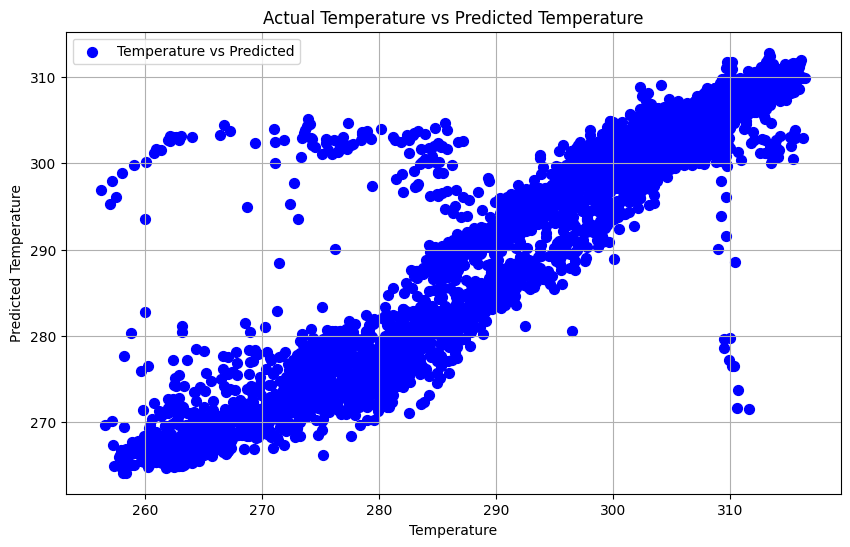

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df_final' is your DataFrame

# Extract data for plotting
temperature_avg = df_final['Temperature']
predicted = df_final['Predicted']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(temperature_avg, predicted, c='blue', marker='o', s=50, label='Temperature vs Predicted')

# Customize labels and title
plt.xlabel('Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual Temperature vs Predicted Temperature')

# Add legend
plt.legend()

# Grid and display the plot
plt.grid(True)
plt.show()


In [45]:
# Extracting the columns for the first dataframe
first_df = df_final[['Temperature','lat', 'lon']]

# Extracting the columns for the second dataframe
second_df = df_final[['Predicted','lat', 'lon']]

# Displaying the first dataframe
print("First Dataframe:")
print(first_df.head())

# Displaying the second dataframe
print("\nSecond Dataframe:")
print(second_df.head())


First Dataframe:
     Temperature        lat    lon
364   310.484711  23.879999  68.28
365   306.123901  23.759999  68.28
366   302.330902  23.639999  68.28
618   311.363403  23.879999  68.40
619   306.361420  23.759999  68.40

Second Dataframe:
      Predicted        lat    lon
364  288.565293  23.879999  68.28
365  303.004898  23.759999  68.28
366  308.869256  23.639999  68.28
618  304.518622  23.879999  68.40
619  306.949266  23.759999  68.40


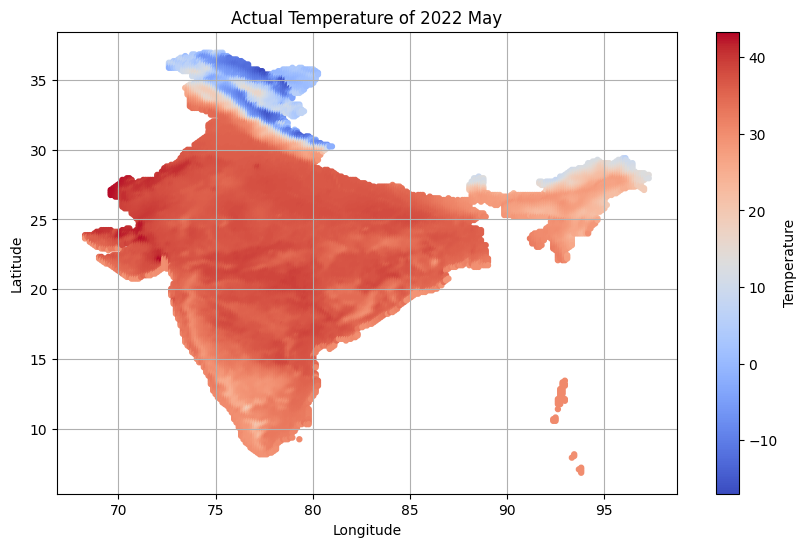

In [46]:
import matplotlib.pyplot as plt

# Assuming df_cleaned has already been defined

# Reset index to make the columns 'lat' and 'lon' accessible for plotting
first_df.reset_index(inplace=True)
temperature_celsius = df_final['Temperature'] - 273.15
# Extract latitudes, longitudes, and humidity_avg values
latitudes = first_df['lat']
longitudes =first_df['lon']
temperature_avg =temperature_celsius

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=temperature_avg, cmap='coolwarm',marker='.', s=50)
plt.colorbar(label='Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Actual Temperature of 2022 May')
plt.grid(True)
plt.show()


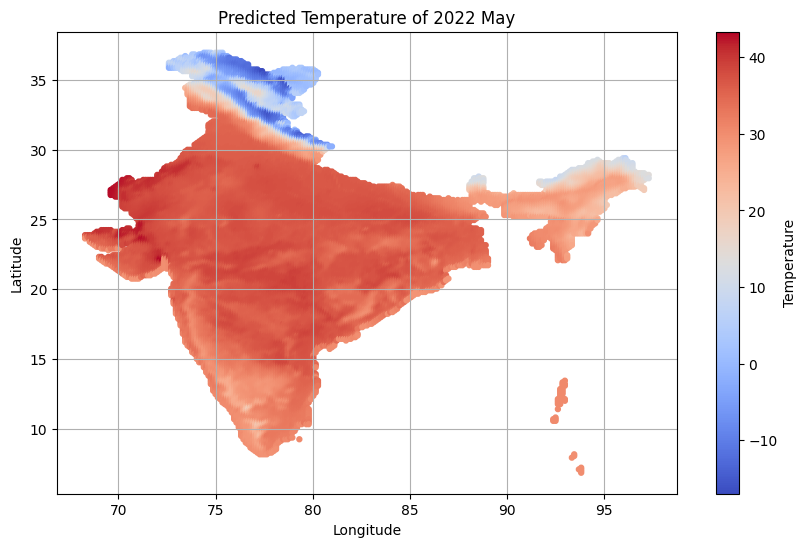

In [47]:
import matplotlib.pyplot as plt

# Assuming df_cleaned has already been defined

# Reset index to make the columns 'lat' and 'lon' accessible for plotting
second_df.reset_index(inplace=True)
temperature_celsius = df_final['Temperature'] - 273.15
# Extract latitudes, longitudes, and humidity_avg values
latitudes = second_df['lat']
longitudes =second_df['lon']
temperature_avg =temperature_celsius

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=temperature_avg, cmap='coolwarm',marker='.', s=50)
plt.colorbar(label='Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Temperature of 2022 May')
plt.grid(True)
plt.show()


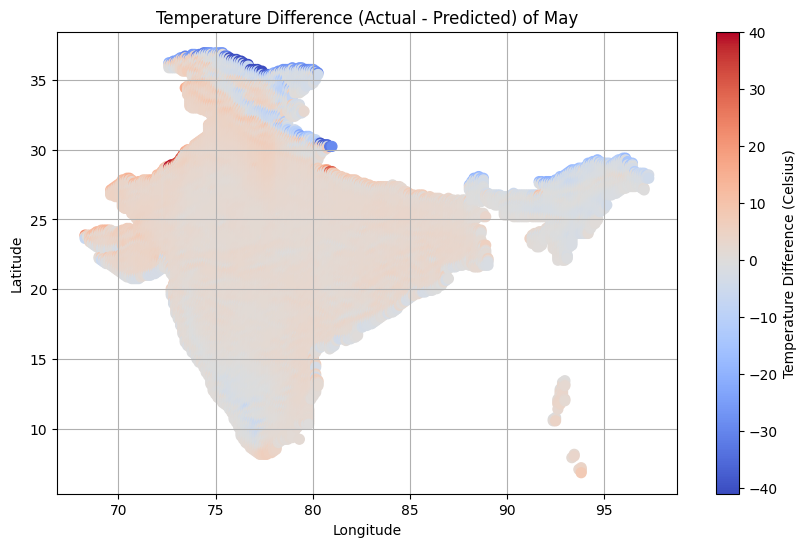

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate temperature difference
Temperature_Difference = df_final['Temperature'] - df_final['Predicted']

# Extract data for plotting
latitude = df_final['lat']
longitude = df_final['lon']
temperature_difference = Temperature_Difference

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=temperature_difference, cmap='coolwarm', marker='o', s=50, label='Temperature Difference (Celsius)')

# Customize labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature Difference (Actual - Predicted) of May')

# Colorbar for temperature difference
colorbar = plt.colorbar(label='Temperature Difference (Celsius)')

# Grid and display the plot
plt.grid(True)
plt.show()


In [50]:
model.save("Temperature_Model.h5")